In [1]:
import sys

sys.path.append("..")

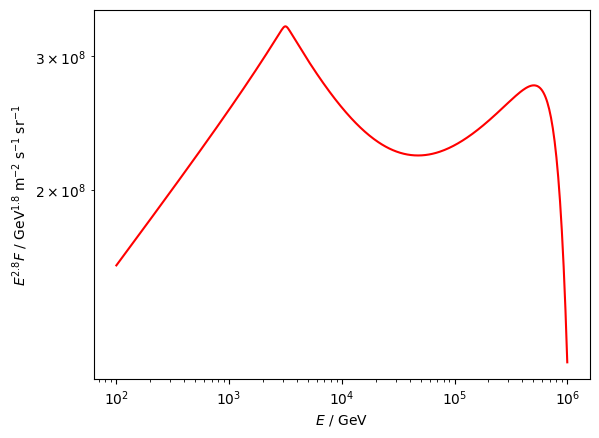

In [7]:
import numpy as np

from cr_knee_fit.cr_model import (
    CosmicRaysModel,
    SharedPowerLawSpectrum,
    SpectralBreak,
    SpectralBreakConfig,
    SpectralCutoff,
    SpectralCutoffConfig,
)
from cr_knee_fit.elements import Element
from cr_knee_fit.utils import label_energy_flux

m = CosmicRaysModel(
    base_spectra=[SharedPowerLawSpectrum(lgI_per_element={Element.H: 1e-8}, alpha=2.6)],
    breaks=[
        SpectralBreak(
            lg_break=3.5,
            d_alpha=0.5,
            lg_sharpness=np.log(5),
            config=SpectralBreakConfig(is_softening=True),
        ),
        SpectralBreak(
            lg_break=4.5,
            d_alpha=-0.5,
            lg_sharpness=np.log(1),
            config=SpectralBreakConfig(is_softening=False),
        ),
    ],
    cutoff=SpectralCutoff(lg_cut=6, lg_sharpness=np.log(2), config=SpectralCutoffConfig()),
)

scale = 2.8
ax = m.plot(Emin=1e2, Emax=1e6, scale=scale, grid_size=500)

ax.set_xscale("log")
ax.set_yscale("log")
label_energy_flux(ax, scale=scale)